<a href="https://colab.research.google.com/github/AdvaySharma147/College_Experiments/blob/main/Artificial_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 1.1

In [ ]:
from collections import deque
# Define the goal state
def is_goal_state(state):
    return state == (4, 4, 0)

In [ ]:
# Generate all possible moves from a given state
def get_possible_moves(state):
    # Extract the amount of water in each jug
    a, b, c = state
    possible_moves = []
    # Define the capacities of the jugs
    cap_a, cap_b, cap_c = 8, 5, 3
    # Generate all possible moves (pouring from one jug to another)
    if a > 0:  # Pour from A to B or C
        pour_to_b = min(a, cap_b - b)
        pour_to_c = min(a, cap_c - c)
        possible_moves.append((a - pour_to_b, b + pour_to_b, c))  # A -> B
        possible_moves.append((a - pour_to_c, b, c + pour_to_c))  # A -> C
    if b > 0:  # Pour from B to A or C
        pour_to_a = min(b, cap_a - a)
        pour_to_c = min(b, cap_c - c)
        possible_moves.append((a + pour_to_a, b - pour_to_a, c))  # B -> A
        possible_moves.append((a, b - pour_to_c, c + pour_to_c))  # B -> C
    if c > 0:  # Pour from C to A or B
        pour_to_a = min(c, cap_a - a)
        pour_to_b = min(c, cap_b - b)
        possible_moves.append((a + pour_to_a, b, c - pour_to_a))  # C -> A
        possible_moves.append((a, b + pour_to_b, c - pour_to_b))  # C -> B
    return possible_moves

In [ ]:
def bfs_solve(initial_state):
    # Initialize the queue and visited set
    queue = deque([(initial_state, [])])
    visited = set()
    while queue:
        current_state, path = queue.popleft()
        # If we've reached the goal state, return the path to this state
        if is_goal_state(current_state):
            return path + [current_state]
        # Mark the current state as visited
        visited.add(current_state)
        # Generate all possible moves from the current state
        for next_state in get_possible_moves(current_state):
            if next_state not in visited:
                queue.append((next_state, path + [current_state]))
    return None  # No solution found

In [ ]:
# Initial state where A = 8, B = 0, C = 0
initial_state = (8, 0, 0)
# Solve the problem using BFS
solution_path = bfs_solve(initial_state)
# Print the solution path
if solution_path:
    for state in solution_path:
        print(state)
else:
    print("No solution found.")

(8, 0, 0)
(3, 5, 0)
(3, 2, 3)
(6, 2, 0)
(6, 0, 2)
(1, 5, 2)
(1, 4, 3)
(4, 4, 0)


# Experiment 1.2

In [ ]:
import itertools
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route)):
        total_distance += distance_matrix[route[i-1]][route[i]]
    return total_distance

In [ ]:
def nearest_neighbor_tsp(distance_matrix, city_names):
    n = len(distance_matrix)
    start = 0  # Starting from the first city (can be any)
    visited = [False] * n
    route = [start]
    visited[start] = True
    for _ in range(n - 1):
        last = route[-1]
        next_city = min(
            [(dist, city) for city, dist in enumerate(distance_matrix[last]) if not visited[city]]
        )[1]
        route.append(next_city)
        visited[next_city] = True
    # Return to the starting city
    route.append(start)
    # Convert route indices to city names
    named_route = [city_names[i] for i in route]
    return named_route, calculate_total_distance(route, distance_matrix)

In [ ]:
# Example distance matrix (A, B, C, D)
distance_matrix = [
    [0, 10, 15, 20],  # Distances from A to A, B, C, D
    [10, 0, 35, 25],  # Distances from B to A, B, C, D
    [15, 35, 0, 30],  # Distances from C to A, B, C, D
    [20, 25, 30, 0]   # Distances from D to A, B, C, D
]

In [ ]:
city_names = ['A', 'B', 'C', 'D']

In [ ]:
route, total_distance = nearest_neighbor_tsp(distance_matrix, city_names)

In [ ]:
print(f"Route: {route}")
print(f"Total Distance: {total_distance}")

Route: ['A', 'B', 'D', 'C', 'A']
Total Distance: 80


# Experiment 1.3

In [ ]:
import heapq
def manhattan_distance(state, goal):
    """Calculate the Manhattan distance of a state from the goal."""
    distance = 0
    for i in range(1, 9):  # Skip the blank space (0)
        current_pos = state.index(i)
        goal_pos = goal.index(i)
        current_x, current_y = divmod(current_pos, 3)
        goal_x, goal_y = divmod(goal_pos, 3)
        distance += abs(current_x - goal_x) + abs(current_y - goal_y)
    return distance

In [ ]:
def get_neighbors(state):
    """Generate all possible states by moving the blank space."""
    neighbors = []
    index = state.index(0)  # Find the blank space
    x, y = divmod(index, 3)
    # Possible moves (left, right, up, down)
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dx, dy in moves:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < 3 and 0 <= new_y < 3:  # Check boundaries
            new_index = new_x * 3 + new_y
            new_state = list(state)
            new_state[index], new_state[new_index] = new_state[new_index], new_state[index]
            neighbors.append(tuple(new_state))
    return neighbors

In [ ]:
def a_star_search(initial, goal):
    """A* search to solve the 8-puzzle problem."""
    open_set = []
    heapq.heappush(open_set, (0, initial, []))  # (priority, state, path)
    closed_set = set()
    while open_set:
        _, current, path = heapq.heappop(open_set)
        if current == goal:
            return path + [current]
        closed_set.add(current)
        for neighbor in get_neighbors(current):
            if neighbor not in closed_set:
                priority = len(path) + 1 + manhattan_distance(neighbor, goal)
                heapq.heappush(open_set, (priority, neighbor, path + [current]))
    return None

In [ ]:
# Example usage
initial_state = (1, 7, 3, 5, 6, 0, 2, 8, 4)  # Represents the puzzle as a tuple
goal_state = (1, 2, 3, 8, 0, 4, 7, 6, 5)    # Goal state

In [ ]:
solution_path = a_star_search(initial_state, goal_state)

In [ ]:
# Print the solution path
if solution_path:
    print(f"Solution found in {len(solution_path) - 1} moves.")
    for state in solution_path:
        for i in range(0, 9, 3):
            print(state[i:i+3])
        print()
else:
    print("No solution found.")

Solution found in 19 moves.
(1, 7, 3)
(5, 6, 0)
(2, 8, 4)

(1, 7, 3)
(5, 0, 6)
(2, 8, 4)

(1, 0, 3)
(5, 7, 6)
(2, 8, 4)

(0, 1, 3)
(5, 7, 6)
(2, 8, 4)

(5, 1, 3)
(0, 7, 6)
(2, 8, 4)

(5, 1, 3)
(2, 7, 6)
(0, 8, 4)

(5, 1, 3)
(2, 7, 6)
(8, 0, 4)

(5, 1, 3)
(2, 0, 6)
(8, 7, 4)

(5, 1, 3)
(0, 2, 6)
(8, 7, 4)

(0, 1, 3)
(5, 2, 6)
(8, 7, 4)

(1, 0, 3)
(5, 2, 6)
(8, 7, 4)

(1, 2, 3)
(5, 0, 6)
(8, 7, 4)

(1, 2, 3)
(0, 5, 6)
(8, 7, 4)

(1, 2, 3)
(8, 5, 6)
(0, 7, 4)

(1, 2, 3)
(8, 5, 6)
(7, 0, 4)

(1, 2, 3)
(8, 0, 6)
(7, 5, 4)

(1, 2, 3)
(8, 6, 0)
(7, 5, 4)

(1, 2, 3)
(8, 6, 4)
(7, 5, 0)

(1, 2, 3)
(8, 6, 4)
(7, 0, 5)

(1, 2, 3)
(8, 0, 4)
(7, 6, 5)



# Experiment 2

In [ ]:
class Puzzle:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state

    def is_goal(self, state):
        return state == self.goal_state

    def move_gen(self, state):
        neighbors = []
        blank_index = state.index(0)
        row, col = divmod(blank_index, 3)

        def swap_and_create(new_blank_index):
            new_state = list(state)
            new_state[blank_index], new_state[new_blank_index] = new_state[new_blank_index], new_state[blank_index]
            return tuple(new_state)

        if row > 0:  # Move blank tile up
            new_blank_index = blank_index - 3
            neighbors.append(swap_and_create(new_blank_index))
        if row < 2:  # Move blank tile down
            new_blank_index = blank_index + 3
            neighbors.append(swap_and_create(new_blank_index))
        if col > 0:  # Move blank tile left
            new_blank_index = blank_index - 1
            neighbors.append(swap_and_create(new_blank_index))
        if col < 2:  # Move blank tile right
            new_blank_index = blank_index + 1
            neighbors.append(swap_and_create(new_blank_index))

        return neighbors

    def occurs_in(self, node, path):
        return node in path

    def remove_seen(self, nodes, seen):
        return [node for node in nodes if node not in seen]

    def make_pair(self, node1, node2):
        return (node1, node2)

    def reconstruct_path(self, came_from, start, goal):
        path = []
        current = goal
        while current != start:
            path.append(current)
            current = came_from[current]
        path.append(start)
        path.reverse()
        return path

    def depth_limited_search(self, start, depth):
        def recursive_dls(node, depth, path, came_from):
            if depth == 0:
                return None
            if self.is_goal(node):
                return path + [node]
            for neighbor in self.move_gen(node):
                if not self.occurs_in(neighbor, path):
                    new_path = path + [node]
                    came_from[neighbor] = node
                    result = recursive_dls(neighbor, depth - 1, new_path, came_from)
                    if result:
                        return result
            return None

        visited = set()
        came_from = {}
        return recursive_dls(start, depth, [], came_from)

    def dfid(self, start):
        depth = 0
        while True:
            path = self.depth_limited_search(start, depth)
            if path:
                return path
            depth += 1

def input_state(prompt):
    while True:
        try:
            state = tuple(map(int, input(prompt).strip().split()))
            if len(state) == 9 and set(state) == set(range(9)):
                return state
            else:
                print("Invalid state. Please enter 9 unique numbers from 0 to 8.")
        except ValueError:
            print("Invalid input. Please enter numbers only.")

In [ ]:
# Get initial and goal states from user
print("Enter the initial state (9 numbers separated by spaces):")
initial_state = input_state("Initial state: ")
print("Enter the goal state (9 numbers separated by spaces):")
goal_state = input_state("Goal state: ")
puzzle = Puzzle(initial_state, goal_state)
solution_path = puzzle.dfid(initial_state)
if solution_path:
    print("Path to goal:")
    for state in solution_path:
        print(state)
else:
    print("No solution found")

Enter the initial state (9 numbers separated by spaces):
Initial state: 2 8 3 1 6 4 7 0 5
Enter the goal state (9 numbers separated by spaces):
Goal state: 1 2 3 8 0 4 7 6 5
Path to goal:
(2, 8, 3, 1, 6, 4, 7, 0, 5)
(2, 8, 3, 1, 0, 4, 7, 6, 5)
(2, 0, 3, 1, 8, 4, 7, 6, 5)
(0, 2, 3, 1, 8, 4, 7, 6, 5)
(1, 2, 3, 0, 8, 4, 7, 6, 5)
(1, 2, 3, 8, 0, 4, 7, 6, 5)


# Experiment 3

**HILL CLIMBING**

In [ ]:
from queue import PriorityQueue

In [ ]:
# Move Generation Function
def movegen(state):
    moves = []
    for i in range(len(state)):
        if state[i]:  # If stack i is not empty
            block = state[i][-1]  # Top block of stack i
            for j in range(len(state)):
                if i != j:
                    new_state = list(map(list, state))
                    new_state[j].append(new_state[i].pop())
                    moves.append(tuple(map(tuple, new_state)))
    return moves

In [ ]:
# Heuristic 1: Number of Blocks Out of Place
def heuristic1(state, goal):
    out_of_place = 0
    for i, stack in enumerate(state):
        for j, block in enumerate(stack):
            if j < len(goal[i]):
                if block != goal[i][j]:
                    out_of_place += 1
            else:
                out_of_place += 1
    return out_of_place

In [ ]:
# Heuristic 2: Manhattan Distance
def heuristic2(state, goal):
    distance_sum = 0
    block_positions = {block: (i, j) for i, stack in enumerate(goal) for j, block in enumerate(stack)}
    for i, stack in enumerate(state):
        for j, block in enumerate(stack):
            if block in block_positions:
                target_stack, target_index = block_positions[block]
                distance_sum += abs(i - target_stack) + abs(j - target_index)
            else:
                # If the block is not in the goal, add a large penalty
                distance_sum += float('inf')
    return distance_sum

In [ ]:
# Hill Climbing with Debugging
def hill_climbing_debug(initial_state, goal_state, heuristic):
    current_state = initial_state
    print(f"Initial State: {current_state}")
    while True:
        current_heuristic = heuristic(current_state, goal_state)
        print(f"Current State: {current_state}, Heuristic Value: {current_heuristic}")
        neighbors = movegen(current_state)
        if not neighbors:
            return current_state, current_heuristic
        next_state = min(neighbors, key=lambda state: heuristic(state, goal_state))
        next_heuristic = heuristic(next_state, goal_state)
        if next_heuristic >= current_heuristic:
            return current_state, current_heuristic
        current_state = next_state

In [ ]:
# Define Initial and Goal States
initial_state = (('D', 'C', 'B', 'A'), ('F', 'E'))
goal_state = (('D', 'C', 'B', 'E', 'A'), ('F',))

In [ ]:
# Run Hill Climbing with Heuristic 1
print("Hill Climbing with Heuristic 1:")
result1 = hill_climbing_debug(initial_state, goal_state, heuristic1)
print("Final State:", result1[0])
print("Heuristic Value:", result1[1])

Hill Climbing with Heuristic 1:
Initial State: (('D', 'C', 'B', 'A'), ('F', 'E'))
Current State: (('D', 'C', 'B', 'A'), ('F', 'E')), Heuristic Value: 2
Final State: (('D', 'C', 'B', 'A'), ('F', 'E'))
Heuristic Value: 2


In [ ]:
# Run Hill Climbing with Heuristic 2
print("Hill Climbing with Heuristic 2:")
result2 = hill_climbing_debug(initial_state, goal_state, heuristic2)
print("Final State:", result2[0])
print("Heuristic Value:", result2[1])

Hill Climbing with Heuristic 2:
Initial State: (('D', 'C', 'B', 'A'), ('F', 'E'))
Current State: (('D', 'C', 'B', 'A'), ('F', 'E')), Heuristic Value: 4
Current State: (('D', 'C', 'B', 'A', 'E'), ('F',)), Heuristic Value: 2
Final State: (('D', 'C', 'B', 'A', 'E'), ('F',))
Heuristic Value: 2


**BEST FIRST SEARCH**

In [ ]:
from queue import PriorityQueue

In [ ]:
# Move generation function
def movegen(state):
    moves = []
    for i in range(len(state)):
        if state[i]:  # If stack i is not empty
            block = state[i][-1]  # Top block of stack i
            for j in range(len(state)):
                if i != j:
                    new_state = list(map(list, state))
                    new_state[j].append(new_state[i].pop())
                    moves.append(tuple(map(tuple, new_state)))
    return moves

In [ ]:
# Heuristic 1: Number of Blocks Out of Place
def heuristic1(state, goal):
    out_of_place = 0
    for i, stack in enumerate(state):
        for j, block in enumerate(stack):
            if j < len(goal[i]):
                if block != goal[i][j]:
                    out_of_place += 1
            else:
                out_of_place += 1
    return out_of_place

In [ ]:
def heuristic2(state, goal):
    distance_sum = 0
    # Create a dictionary to map blocks to their target positions
    block_positions = {}
    for stack_index, stack in enumerate(goal):
        for position, block in enumerate(stack):
            block_positions[block] = (stack_index, position)
    # Calculate Manhattan distance for each block in the current state
    for stack_index, stack in enumerate(state):
        for position, block in enumerate(stack):
            if block in block_positions:
                target_stack_index, target_position = block_positions[block]
                distance_sum += abs(stack_index - target_stack_index) + abs(position - target_position)
    return distance_sum

In [ ]:
# Combined Heuristic: Average of Heuristic 1 and Heuristic 2
def combined_heuristic(state, goal):
    return (heuristic1(state, goal) + heuristic2(state, goal)) / 2

In [ ]:
# Best First Search with Step Logging
def best_first_search_with_logging(initial_state, goal_state, heuristic):
    pq = PriorityQueue()
    pq.put((heuristic(initial_state, goal_state), initial_state))
    visited = set()
    min_heuristic_state = initial_state
    min_heuristic_value = heuristic(initial_state, goal_state)
    print("Starting Best First Search with heuristic function...")
    while not pq.empty():
        current_heuristic, current_state = pq.get()
        # Update the minimum heuristic state and value
        if current_heuristic < min_heuristic_value:
            min_heuristic_value = current_heuristic
            min_heuristic_state = current_state
        # Print the current state and heuristic value
        print(f"Current State: {current_state}, Heuristic Value: {current_heuristic}")
        if current_state == goal_state:
            print("Goal State Reached!")
            return current_state, current_heuristic
        visited.add(current_state)
        for neighbor in movegen(current_state):
            if neighbor not in visited:
                pq.put((heuristic(neighbor, goal_state), neighbor))
    # Return the state with the minimum heuristic value if goal not reached
    print("No solution found, returning state with minimum heuristic value.")
    return min_heuristic_state, min_heuristic_value

In [ ]:
# Define the initial and goal states
initial_state = (('D', 'C', 'B', 'A'), ('F', 'E'))
goal_state = (('D', 'C', 'B', 'E', 'A'), ('F',))

In [ ]:
# Run Best First Search with Heuristic 1
print("Best First Search with Heuristic 1:")
result_bfs1 = best_first_search_with_logging(initial_state, goal_state, heuristic1)
print("Final State:", result_bfs1[0])
print("Heuristic Value:", result_bfs1[1])

Best First Search with Heuristic 1:
Starting Best First Search with heuristic function...
Current State: (('D', 'C', 'B', 'A'), ('F', 'E')), Heuristic Value: 2
Current State: (('D', 'C', 'B'), ('F', 'E', 'A')), Heuristic Value: 2
Current State: (('D', 'C', 'B', 'A', 'E'), ('F',)), Heuristic Value: 2
Current State: (('D', 'C'), ('F', 'E', 'A', 'B')), Heuristic Value: 3
Current State: (('D', 'C', 'B', 'A', 'E', 'F'), ()), Heuristic Value: 3
Current State: (('D',), ('F', 'E', 'A', 'B', 'C')), Heuristic Value: 4
Current State: ((), ('F', 'E', 'A', 'B', 'C', 'D')), Heuristic Value: 5
No solution found, returning state with minimum heuristic value.
Final State: (('D', 'C', 'B', 'A'), ('F', 'E'))
Heuristic Value: 2


In [ ]:
# Run Best First Search with Heuristic 2
print("Best First Search with Heuristic 2:")
result_bfs2 = best_first_search_with_logging(initial_state, goal_state, heuristic2)
print("Final State:", result_bfs2[0])
print("Heuristic Value:", result_bfs2[1])

Best First Search with Heuristic 2:
Starting Best First Search with heuristic function...
Current State: (('D', 'C', 'B', 'A'), ('F', 'E')), Heuristic Value: 4
Current State: (('D', 'C', 'B', 'A', 'E'), ('F',)), Heuristic Value: 2
Current State: (('D', 'C', 'B'), ('F', 'E', 'A')), Heuristic Value: 6
Current State: (('D', 'C'), ('F', 'E', 'A', 'B')), Heuristic Value: 8
Current State: (('D', 'C', 'B', 'A', 'E', 'F'), ()), Heuristic Value: 8
Current State: (('D',), ('F', 'E', 'A', 'B', 'C')), Heuristic Value: 12
Current State: ((), ('F', 'E', 'A', 'B', 'C', 'D')), Heuristic Value: 18
No solution found, returning state with minimum heuristic value.
Final State: (('D', 'C', 'B', 'A', 'E'), ('F',))
Heuristic Value: 2


In [ ]:
# Run Best First Search with Combined Heuristic
print("Best First Search with Combined Heuristic:")
result_combined_bfs = best_first_search_with_logging(initial_state, goal_state, combined_heuristic)
print("Final State:", result_combined_bfs[0])
print("Heuristic Value:", result_combined_bfs[1])

Best First Search with Combined Heuristic:
Starting Best First Search with heuristic function...
Current State: (('D', 'C', 'B', 'A'), ('F', 'E')), Heuristic Value: 3.0
Current State: (('D', 'C', 'B', 'A', 'E'), ('F',)), Heuristic Value: 2.0
Current State: (('D', 'C', 'B'), ('F', 'E', 'A')), Heuristic Value: 4.0
Current State: (('D', 'C'), ('F', 'E', 'A', 'B')), Heuristic Value: 5.5
Current State: (('D', 'C', 'B', 'A', 'E', 'F'), ()), Heuristic Value: 5.5
Current State: (('D',), ('F', 'E', 'A', 'B', 'C')), Heuristic Value: 8.0
Current State: ((), ('F', 'E', 'A', 'B', 'C', 'D')), Heuristic Value: 11.5
No solution found, returning state with minimum heuristic value.
Final State: (('D', 'C', 'B', 'A', 'E'), ('F',))
Heuristic Value: 2.0


# Experiment 4

In [ ]:
import itertools
# Define the SAT problems as functions
def sat_problem_1(variables):
    A, B, C, D, E = variables
    clauses = [
        (A or not B),
        (B or not C),
        (not B),
        (not C or E),
        (A or C),
        (not C or not D)
    ]
    return clauses

In [ ]:
def sat_problem_2(variables):
    A, B, C, D, E = variables
    clauses = [
        (A or B),
        (A and not C),
        (B and D),
        (A or not E)
    ]
    return clauses

In [ ]:
# Generate neighbors by flipping combinations of variables
def generate_neighborhoods(solution, k):
    """Generate all neighbors by flipping k variables."""
    indices = range(len(solution))
    neighborhoods = []
    for combination in itertools.combinations(indices, k):
        neighbor = solution.copy()
        for index in combination:
            neighbor[index] = not neighbor[index]  # Flip the variables in the combination
        neighborhoods.append(neighbor)
    return neighborhoods

In [ ]:
# Heuristic function: Calculate the number of satisfied clauses
def heuristic(clauses):
    return sum(clauses)

In [ ]:
# Hill Climbing function within VND
def hill_climbing_in_neighborhood(sat_problem, initial_solution, k):
    """
    Perform hill climbing within a neighborhood defined by flipping k variables.
    """
    current_solution = initial_solution.copy()
    best_solution = current_solution.copy()
    best_score = heuristic(sat_problem(current_solution))
    neighborhoods = generate_neighborhoods(current_solution, k)
    print(f"\nExploring neighborhoods with {k} flips.")
    print(f"Current Solution: {current_solution}, Heuristic Value: {best_score}")
    print(f"Possible Moves and Heuristic Values:")
    for idx, neighbor in enumerate(neighborhoods):
        neighbor_clauses = sat_problem(neighbor)
        neighbor_score = heuristic(neighbor_clauses)
        print(f"  Move {idx + 1}: {neighbor} -> Heuristic Value: {neighbor_score}")
        if neighbor_score > best_score:  # If this neighbor has a better score
            current_solution = neighbor.copy()
            best_solution = current_solution.copy()
            best_score = neighbor_score
            print(f"  ** Chose Move {idx + 1} ** New Best Solution: {best_solution} with Heuristic Value: {best_score}")
            break  # Exit after finding the first better move (standard hill climbing approach)
    return best_solution, best_score

In [ ]:
# Variable Neighborhood Descent (VND) function using Hill Climbing
def variable_neighborhood_descent(sat_problem, initial_solution, max_iterations=100):
    current_solution = initial_solution.copy()
    best_solution = current_solution.copy()
    best_score = heuristic(sat_problem(current_solution))
    print(f"Initial solution: {current_solution}, Heuristic Value (Satisfied Clauses): {best_score}")
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        improved = False
        # VND: Explore different neighborhoods with increasing number of flips
        for k in range(1, len(current_solution) + 1):
            # Use hill climbing within each neighborhood
            new_solution, new_score = hill_climbing_in_neighborhood(sat_problem, current_solution, k)
            if new_score > best_score:
                current_solution = new_solution.copy()
                best_solution = current_solution.copy()
                best_score = new_score
                improved = True
                print(f"\nFound better solution in neighborhood with {k} flips: {best_solution}, Heuristic Value: {best_score}")
                break  # Stop and restart from this new best solution
        if not improved:
            print("  No better move found in any neighborhood, stopping search.")
            break  # No improvement found in any neighborhood, stop the search
    return best_solution, best_score

In [ ]:
# Start of the script
# Get user input for number of literals
num_literals = int(input("Enter the number of literals (variables): "))
literals = [chr(65 + i) for i in range(num_literals)]  # Generate literal names (A, B, C, ...)
# Get user input for initial solution
initial_solution = []
print(f"Enter the initial truth values for the variables {', '.join(literals)} (True or False):")
for var in literals:
    val = input(f"Enter truth value for {var} (True/False): ").strip().capitalize()
    if val not in ['True', 'False']:
        print(f"Invalid input for {var}. Please enter either 'True' or 'False'.")
        exit()  # Exit the script if invalid input is given
    initial_solution.append(val == 'True')
# Display initial input
print(f"Initial solution provided by the user: {initial_solution}")
# Solve SAT Problem 1 using VND
solution_1, is_satisfied_1 = variable_neighborhood_descent(sat_problem_1, initial_solution)
print(f"\nSAT Problem 1 Solution: {solution_1}, Heuristic Value (Satisfied Clauses): {is_satisfied_1}")
# Solve SAT Problem 2 using VND
solution_2, is_satisfied_2 = variable_neighborhood_descent(sat_problem_2, initial_solution)
print(f"\nSAT Problem 2 Solution: {solution_2}, Heuristic Value (Satisfied Clauses): {is_satisfied_2}")

Enter the number of literals (variables): 5
Enter the initial truth values for the variables A, B, C, D, E (True or False):
Enter truth value for A (True/False): True
Enter truth value for B (True/False): True
Enter truth value for C (True/False): False
Enter truth value for D (True/False): False
Enter truth value for E (True/False): True
Initial solution provided by the user: [True, True, False, False, True]
Initial solution: [True, True, False, False, True], Heuristic Value (Satisfied Clauses): 5

Exploring neighborhoods with 1 flips.
Current Solution: [True, True, False, False, True], Heuristic Value: 5
Possible Moves and Heuristic Values:
  Move 1: [False, True, False, False, True] -> Heuristic Value: 3
  Move 2: [True, False, False, False, True] -> Heuristic Value: 6
  ** Chose Move 2 ** New Best Solution: [True, False, False, False, True] with Heuristic Value: 6

Found better solution in neighborhood with 1 flips: [True, False, False, False, True], Heuristic Value: 6

Exploring n

# Experiment 5

In [ ]:
import numpy as np
import random

In [ ]:
# Distance matrix for 20 cities (hardcoded)
distance_matrix = np.random.randint(1, 100, size=(20, 20))
np.fill_diagonal(distance_matrix, 0)

In [ ]:
# Making the matrix symmetric
for i in range(distance_matrix.shape[0]):
    for j in range(i+1, distance_matrix.shape[1]):
        distance_matrix[i][j] = distance_matrix[j][i]
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[ 0 83  2 80 42 56 70 26 44 72 25 66 58 87 21 24 42  5 81 87]
 [83  0 17 83 20 76 18 26 13 33 24 49 77 43 80 26 19 54 17 85]
 [ 2 17  0 36 14 92 65 89 17 82 46 11 76 72 83 43 16  5 16 21]
 [80 83 36  0 56 43 86 77 48 77 59 31 75 74 82 85 36  5  5 74]
 [42 20 14 56  0 90 30 36 84 50 19  3 19 75 10 96 84 46 64 83]
 [56 76 92 43 90  0 59  3  1 63 46 33 42 24 28 99 33 83 19  3]
 [70 18 65 86 30 59  0 81  8  3 71  7 61 42 91 39 22 49 39 28]
 [26 26 89 77 36  3 81  0  3 62 59 98 51 48 72 61  3 24 95 68]
 [44 13 17 48 84  1  8  3  0 32 31 51  1 12 97 29 28  6 58 48]
 [72 33 82 77 50 63  3 62 32  0 41 86  6 98  4 96 46 78  6 92]
 [25 24 46 59 19 46 71 59 31 41  0 59 16 16 85  4 48 30 38 18]
 [66 49 11 31  3 33  7 98 51 86 59  0 26 62 60 80 18 63 66 45]
 [58 77 76 75 19 42 61 51  1  6 16 26  0 74 93 30 82 39 37 68]
 [87 43 72 74 75 24 42 48 12 98 16 62 74  0 16 37 81  8 14 83]
 [21 80 83 82 10 28 91 72 97  4 85 60 93 16  0 95 49 66 70 34]
 [24 26 43 85 96 99 39 61 29 96  4 80 

In [ ]:
# Initialize the population with random tours
def generate_initial_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        tour = np.random.permutation(num_cities)
        population.append(tour)
    return population

In [ ]:
population = generate_initial_population(population_size=4, num_cities=20)
print(population)

[array([ 1,  8,  3, 12, 16, 11,  0, 10, 19, 15, 18, 17,  4,  9,  6,  5,  2,
       13, 14,  7]), array([12,  0, 10, 15,  3,  9,  5,  1,  2, 13, 11, 19,  6, 17,  4, 14, 16,
        8,  7, 18]), array([19, 16,  1,  8, 18, 17, 12,  7,  2,  4, 11,  9, 15, 10,  0,  6,  3,
        5, 13, 14]), array([15, 10,  7,  1, 14, 12, 17, 16, 11, 13,  5,  8, 18, 19,  4,  0,  6,
        9,  3,  2])]


In [ ]:
# Fitness function (inverse of tour cost)
def calculate_fitness(tour):
    total_distance = 0
    for i in range(len(tour)):
        total_distance += distance_matrix[tour[i], tour[(i + 1) % len(tour)]]
    return total_distance

In [ ]:
# Roulette wheel selection
def selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    selected_idx = np.random.choice(len(population), p=probabilities)
    return population[selected_idx]

In [ ]:
# Cyclic crossover
def cyclic_crossover(parent1, parent2):
    child1, child2 = parent1.copy(), parent2.copy()
    start_idx = random.randint(0, len(parent1) - 1)
    original_idx = start_idx
    visited = set()
    while True:
        gene1, gene2 = child1[start_idx], child2[start_idx]
        child1[start_idx], child2[start_idx] = gene2, gene1
        visited.add(start_idx)
        start_idx = np.where(parent1 == gene2)[0][0]
        # If we have visited this index before, or we're back to the starting index, break
        if start_idx in visited or start_idx == original_idx:
            break
    return child1, child2

In [ ]:
def mutate(tour):
    idx1, idx2 = random.sample(range(len(tour)), 2)
    tour[idx1], tour[idx2] = tour[idx2], tour[idx1]

In [ ]:
# Main genetic algorithm loop
def genetic_algorithm(num_cities, population_size, num_generations):
    population = generate_initial_population(population_size, num_cities)
    best_fitness_over_time = []
    for generation in range(num_generations):
        fitness_scores = [calculate_fitness(tour) for tour in population]
        new_population = []
        for _ in range(population_size // 2):
            parent1 = selection(population, fitness_scores)
            parent2 = selection(population, fitness_scores)
            child1, child2 = cyclic_crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
        best_fitness = max(fitness_scores)
        best_fitness_over_time.append(best_fitness)
        if generation > 0 and best_fitness == best_fitness_over_time[-2]:
            print(f"Convergence reached at generation {generation}")
            break
    return best_fitness_over_time

In [ ]:
# Compare performance with different numbers of cities
def compare_performance():
    city_counts = [5, 10, 20]
    for num_cities in city_counts:
        print(f"\nRunning Genetic Algorithm for {num_cities} cities:")
        best_fitness = genetic_algorithm(num_cities, population_size=4, num_generations=100)
        print(f"Best fitness over time for {num_cities} cities: {best_fitness}")

In [ ]:
# Run the performance comparison
compare_performance()


Running Genetic Algorithm for 5 cities:
Convergence reached at generation 25
Best fitness over time for 5 cities: [258, 238, 258, 238, 258, 250, 238, 250, 238, 258, 238, 258, 200, 238, 250, 238, 200, 238, 234, 200, 238, 258, 250, 258, 250, 250]

Running Genetic Algorithm for 10 cities:
Best fitness over time for 10 cities: [533, 498, 491, 560, 461, 601, 470, 592, 528, 498, 480, 500, 433, 488, 424, 451, 472, 504, 540, 534, 607, 553, 700, 703, 556, 545, 541, 604, 638, 646, 566, 648, 649, 672, 554, 610, 587, 610, 515, 595, 519, 570, 648, 565, 497, 561, 516, 548, 629, 703, 597, 623, 508, 651, 551, 581, 574, 614, 609, 600, 651, 522, 564, 506, 469, 585, 650, 596, 576, 551, 586, 568, 533, 584, 614, 515, 542, 569, 544, 566, 522, 601, 630, 642, 645, 709, 539, 553, 601, 538, 553, 564, 533, 586, 551, 516, 503, 477, 461, 516]

Running Genetic Algorithm for 20 cities:
Convergence reached at generation 77
Best fitness over time for 20 cities: [1179, 1028, 1194, 1175, 1083, 1051, 1135, 1155, 1122, 1

In [ ]:
# Assuming the cities are labeled from A to T
cities = [chr(i) for i in range(ord('A'), ord('T') + 1)]
print("Cities:\n",cities)

Cities:
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']


In [ ]:
# Function to generate a random path
def generate_random_path(cities):
    path = cities[:]
    random.shuffle(path)
    return path

In [ ]:
# Fitness values (as given)
fitness_values = [0.0022988505747126436, 0.0030959752321981426, 0.0030303030303030303,
                  0.0028653295128939827, 0.002824858757062147, 0.0025188916876574307,
                  0.0028169014084507044, 0.002564102564102564, 0.0035087719298245615,
                  0.002564102564102564, 0.002457002457002457, 0.002380952380952381,
                  0.0030120481927710845, 0.003067484662576687, 0.002967359050445104,
                  0.0029585798816568047, 0.0028653295128939827, 0.002577319587628866,
                  0.003663003663003663, 0.003105590062111801, 0.002849002849002849,
                  0.004291845493562232, 0.0029069767441860465, 0.003389830508474576,
                  0.0027397260273972603, 0.003215434083601286, 0.002652519893899204,
                  0.0030303030303030303, 0.0030864197530864196, 0.0028011204481792717,
                  0.0031645569620253164, 0.003134796238244514, 0.002688172043010753,
                  0.0028169014084507044, 0.002793296089385475, 0.003424657534246575,
                  0.0026109660574412533, 0.002849002849002849, 0.002881844380403458,
                  0.003115264797507788, 0.002967359050445104, 0.0026455026455026454,
                  0.0030211480362537764, 0.0030211480362537764]

In [ ]:
# Generating random paths for each fitness value
paths = [generate_random_path(cities) for _ in fitness_values]

In [ ]:
# Displaying the paths alongside their fitness values
for fitness, path in zip(fitness_values, paths):
    print(f"Fitness: {fitness:.16f} - Path: {' -> '.join(path)}")

Fitness: 0.0022988505747126 - Path: B -> J -> K -> S -> N -> C -> Q -> G -> A -> H -> O -> M -> P -> E -> T -> F -> R -> I -> D -> L
Fitness: 0.0030959752321981 - Path: F -> C -> J -> T -> Q -> E -> H -> I -> A -> D -> R -> L -> G -> K -> M -> S -> B -> O -> P -> N
Fitness: 0.0030303030303030 - Path: M -> G -> E -> Q -> S -> R -> D -> O -> B -> I -> J -> F -> N -> P -> A -> C -> T -> K -> L -> H
Fitness: 0.0028653295128940 - Path: N -> G -> F -> R -> J -> O -> K -> I -> D -> H -> E -> C -> A -> Q -> S -> T -> B -> P -> M -> L
Fitness: 0.0028248587570621 - Path: I -> L -> D -> J -> K -> G -> M -> T -> E -> B -> H -> Q -> C -> R -> P -> A -> O -> N -> F -> S
Fitness: 0.0025188916876574 - Path: N -> S -> R -> D -> J -> O -> A -> E -> I -> H -> K -> F -> B -> M -> G -> P -> T -> L -> C -> Q
Fitness: 0.0028169014084507 - Path: E -> B -> A -> R -> D -> F -> K -> M -> I -> G -> C -> P -> L -> H -> Q -> N -> J -> O -> S -> T
Fitness: 0.0025641025641026 - Path: K -> B -> T -> P -> O -> G -> N -

# Experiment 6

In [ ]:
import numpy as np
import heapq
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset into a DataFrame
data = {
    "Location": ["Mumbai", "Pune", "Vapi", "Nagpur", "Nashik", "Aurangabad", "Ahmedabad", "Surat", "Jaipur", "Jodhpur", "Kota", "Jhansi", "Bhopal", "Indore", "Faridabad",
                 "Ghaziabad", "New Delhi", "Noida", "Gurugram", "Manali", "Dharamshala", "Tehsil", "Shimla", "Spiti Valley", "Chandigarh", "Jammu", "Amritsar",
                 "Dalhousie", "Mussoorie", "Dehradun", "Katra", "Srinagar", "Kargil", "Leh"],
    "Latitude": [19.076, 18.5204, 20.3719, 21.1458, 19.9975, 19.8762, 23.0225, 21.1702, 26.9124, 26.2389, 25.2138, 25.4484, 23.2599, 22.7196, 28.4089,
                 28.6692, 28.6139, 28.5355, 28.4595, 32.2396, 32.219, 20.9333, 31.1048, 32.246, 30.7333, 32.7266, 31.634, 32.5373, 30.4599, 30.3165, 32.9856,
                 34.0837, 34.5553, 34.1526],
    "Longitude": [72.8777, 73.8567, 72.9049, 79.0882, 73.7898, 75.3433, 72.5714, 72.8311, 75.7873, 73.0243, 75.8648, 78.5685, 77.4126, 75.8577, 77.3178,
                  77.4538, 77.209, 77.391, 77.0266, 77.1887, 76.3234, 77.8, 77.1734, 78.0081, 76.7794, 74.857, 74.8723, 75.9713, 78.066, 78.0322, 74.9389,
                  74.7973, 76.135, 77.577]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Euclidean distance function between two cities
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2)

In [ ]:
# Test Case 1: Euclidean Distance Trying on Dummy Example
a = euclidean_distance(5, 6, 2, 10)
print(a)

5.0


In [ ]:
# Function to calculate heuristic values (h(n)) using Euclidean distance
def calculate_heuristic(goal_city_index):
    goal_lat = df.loc[goal_city_index, "Latitude"]
    goal_lon = df.loc[goal_city_index, "Longitude"]
    heuristic = {}
    for i in range(len(df)):
        h_value = euclidean_distance(df.loc[i, "Latitude"], df.loc[i, "Longitude"], goal_lat, goal_lon)
        heuristic[df.loc[i, "Location"]] = h_value
    return heuristic

In [ ]:
b = calculate_heuristic(0)
for city, value in b.items():
    print(f"{city}: {value}")

Mumbai: 0.0
Pune: 1.1256697384224206
Vapi: 1.296185422692293
Nagpur: 6.546325861886189
Nashik: 1.296568031381303
Aurangabad: 2.592200493789008
Ahmedabad: 3.9583685957727592
Surat: 2.094718405896125
Jaipur: 8.359122987490972
Jodhpur: 7.164400042571605
Kota: 6.826079053893236
Jhansi: 8.543575738530087
Bhopal: 6.170116467296214
Indore: 4.707039511200213
Faridabad: 10.335255701723106
Ghaziabad: 10.628742985414595
New Delhi: 10.475289785967737
Noida: 10.481031301355797
Gurugram: 10.25979743757156
Manali: 13.851537313959055
Dharamshala: 13.587174006760938
Tehsil: 5.261045578589861
Shimla: 12.772825369901524
Spiti Valley: 14.133998166124119
Chandigarh: 12.292920978351724
Jammu: 13.793350167743872
Amritsar: 12.715415571659463
Dalhousie: 13.812203251110953
Mussoorie: 12.510461066643387
Dehradun: 12.36599007358489
Katra: 14.061490589549882
Srinagar: 15.129967727989376
Kargil: 15.818303694770817
Leh: 15.792000761461479


In [ ]:
# A* algorithm
def astar(graph, start, goal, heuristic):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic[start], 0, start))  # (f(n), g(n), city)
    came_from = {}
    g_score = {city: float('inf') for city in graph}
    g_score[start] = 0
    while open_list:
        _, g_current, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g_current
        for neighbor, travel_cost in graph[current].items():
            tentative_g_score = g_current + travel_cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic[neighbor]
                heapq.heappush(open_list, (f_score, tentative_g_score, neighbor))
    return None, None

In [ ]:
# Generate the graph with Euclidean distances between all cities
def create_graph():
    graph = {}
    for i in range(len(df)):
        city_graph = {}
        for j in range(len(df)):
            if i != j:
                city_graph[df.loc[j, "Location"]] = euclidean_distance(df.loc[i, "Latitude"], df.loc[i, "Longitude"],
                                                                       df.loc[j, "Latitude"], df.loc[j, "Longitude"])
        graph[df.loc[i, "Location"]] = city_graph
    return graph

In [ ]:
graph = create_graph()
# Convert the graph dictionary into a DataFrame
data = []
for city, connections in graph.items():
    for neighbor, distance in connections.items():
        data.append((city, neighbor, distance))
df_graph = pd.DataFrame(data, columns=["City", "Neighbor", "Distance"])

In [ ]:
print(df_graph)

       City    Neighbor  Distance
0    Mumbai        Pune  1.125670
1    Mumbai      Nagpur  6.546326
2    Mumbai      Nashik  1.296568
3    Mumbai  Aurangabad  2.592200
4    Mumbai   Ahmedabad  3.958369
..      ...         ...       ...
301     Leh      Manali  1.952011
302     Leh      Shimla  3.074407
303     Leh  Chandigarh  3.511094
304     Leh       Jammu  3.071136
305     Leh    Srinagar  2.780554

[306 rows x 3 columns]


In [ ]:
# Display map of cities
def display_cities():
    plt.figure(figsize=(20, 10))
    plt.scatter(df['Longitude'], df['Latitude'])
    for i, row in df.iterrows():
        plt.annotate(row['Location'], (row['Longitude'], row['Latitude']), fontsize=8)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Cities Map")
    plt.grid(True)
    plt.show()

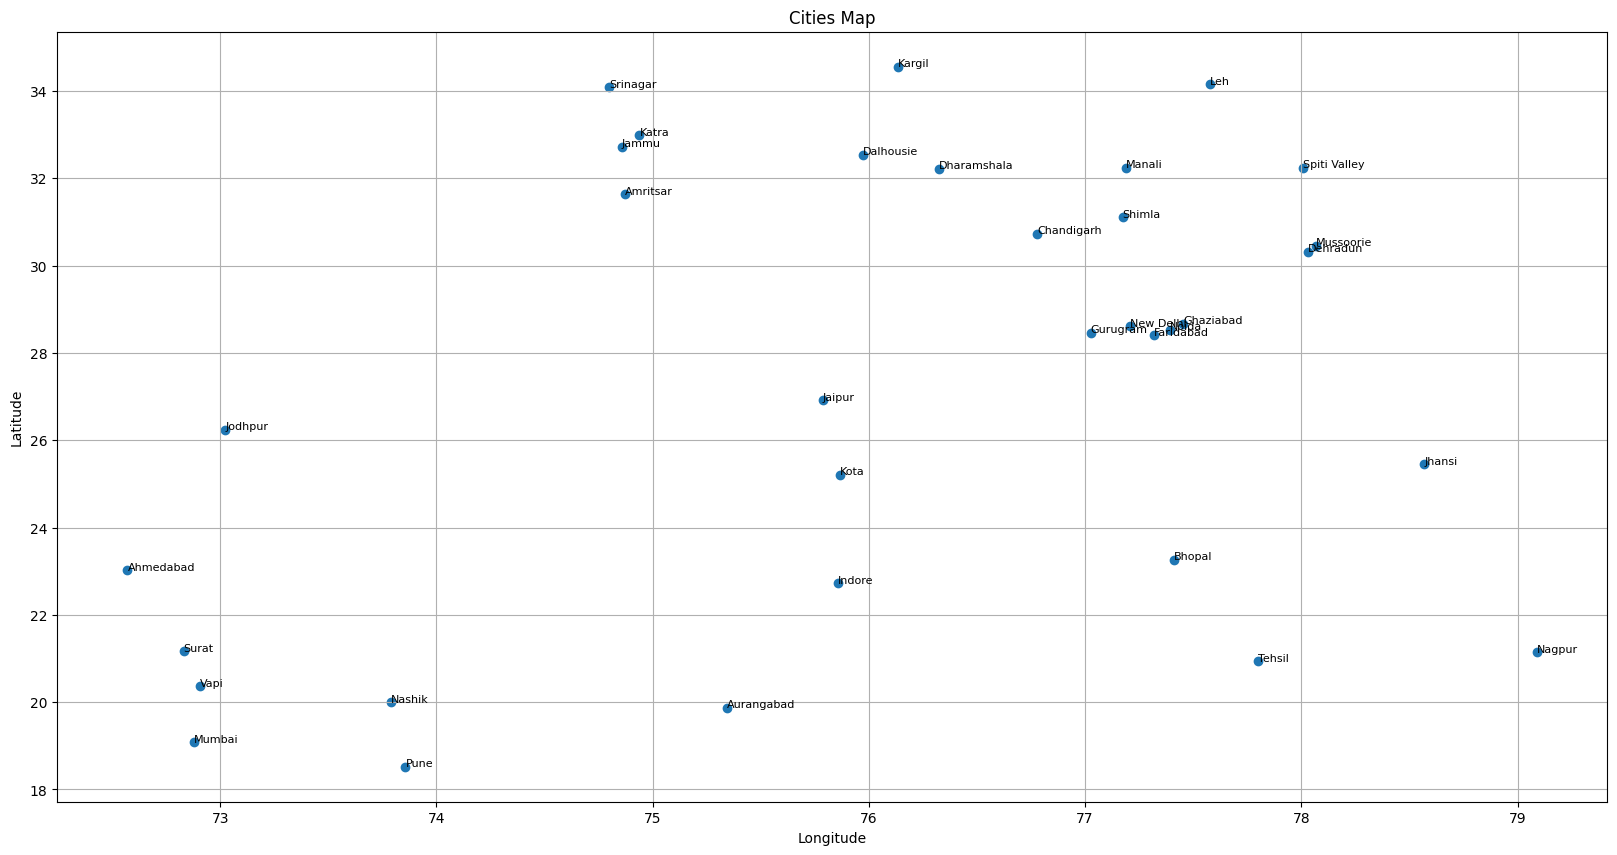

In [ ]:
display_cities()

In [ ]:
# Get start and goal locations
start_city = input("Enter the starting city: ")
goal_city = input("Enter the goal city: ")
# Generate the graph and heuristic values
graph = create_graph()
goal_index = df[df["Location"] == goal_city].index[0]
heuristic = calculate_heuristic(goal_index)
# Run the A* algorithm
path, cost = astar(graph, start_city, goal_city, heuristic)
if path:
  print(f"Shortest Path from {start_city} to {goal_city}: {' -> '.join(path)}")
  print(f"Total Cost: {cost}")
else:
  print("No path found.")

Enter the starting city: Mumbai
Enter the goal city: Leh
Shortest Path from Mumbai to Leh: Mumbai -> Leh
Total Cost: 15.792000761461479


# Experiment 7

In [ ]:
import math
# Constants
PLAYER_X = 'X'  # Human (Minimizer)
PLAYER_O = 'O'  # Computer (Maximizer)
EMPTY = ' '     # Empty cells

In [ ]:
# Display the Tic-Tac-Toe board
def print_board(board):
    for row in board:
        print("|".join(row))
        print("-" * 5)

In [ ]:
# Check if a player has won
def check_winner(board, player):
    win_cond = [
        [board[0][0], board[0][1], board[0][2]],
        [board[1][0], board[1][1], board[1][2]],
        [board[2][0], board[2][1], board[2][2]],
        [board[0][0], board[1][0], board[2][0]],
        [board[0][1], board[1][1], board[2][1]],
        [board[0][2], board[1][2], board[2][2]],
        [board[0][0], board[1][1], board[2][2]],
        [board[2][0], board[1][1], board[0][2]]
    ]
    return [player, player, player] in win_cond

In [ ]:
# Check if board is full
def is_board_full(board):
    return all(cell != EMPTY for row in board for cell in row)

In [ ]:
# Evaluate board state
def evaluate(board):
    if check_winner(board, PLAYER_O):
        return 1  # (Computer) wins
    elif check_winner(board, PLAYER_X):
        return -1  # (Human) wins
    else:
        return 0  # Draw

In [ ]:
# Minimax Algorithm
def minimax(board, depth, is_maximizing):
    score = evaluate(board)
    # If one player has won or it's a draw, return the score
    if score == 1 or score == -1 or is_board_full(board):
        return score
    if is_maximizing:  # Maximizer (Computer's turn)
        best = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == EMPTY:
                    board[i][j] = PLAYER_O
                    best = max(best, minimax(board, depth + 1, False))
                    board[i][j] = EMPTY
        return best
    else:  # Minimizer (Human's turn)
        best = math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == EMPTY:
                    board[i][j] = PLAYER_X
                    best = min(best, minimax(board, depth + 1, True))
                    board[i][j] = EMPTY
        return best

In [ ]:
# Find the best move for the computer
def find_best_move(board):
    best_val = -math.inf
    best_move = (-1, -1)
    for i in range(3):
        for j in range(3):
            if board[i][j] == EMPTY:
                board[i][j] = PLAYER_O
                move_val = minimax(board, 0, False)
                board[i][j] = EMPTY
                if move_val > best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move

In [ ]:
# Function to check if the move is valid
def is_valid_move(board, row, col):
    return board[row][col] == EMPTY

In [ ]:
# Main function to run the game
def play_game():
    board = [
        [EMPTY, EMPTY, EMPTY],
        [EMPTY, EMPTY, EMPTY],
        [EMPTY, EMPTY, EMPTY]
    ]
    print("Welcome to Tic-Tac-Toe!")
    print_board(board)
    # Ask the user if they want to start first
    while True:
        first_player = input("Do you want to start first? (yes/no): ").lower()
        if first_player in ["yes", "no"]:
            break
        else:
            print("Invalid input, please enter 'yes' or 'no'.")
    while True:
        if first_player == "yes":
            # Human's turn (Minimizer - X)
            print("\nYour Turn! Enter row and column numbers (0, 1, or 2).")
            user_move = input("Enter your move (row col): ").split()
            row, col = int(user_move[0]), int(user_move[1])
            if is_valid_move(board, row, col):
                board[row][col] = PLAYER_X
            else:
                print("Invalid move, try again.")
                continue
            print("\nBoard after your move:")
            print_board(board)
            # Check for win or draw after human's move
            if check_winner(board, PLAYER_X):
                print("\nCongratulations! You win!")
                break
            elif is_board_full(board):
                print("\nIt's a draw!")
                break
            first_player = "no"  # Switch to computer's turn
        else:
            # Computer's turn (Maximizer - O)
            print("\nComputer's Turn...")
            best_move = find_best_move(board)
            if best_move != (-1, -1):
                board[best_move[0]][best_move[1]] = PLAYER_O
            print("\nBoard after Computer's move:")
            print_board(board)
            # Check for win or draw after computer's move
            if check_winner(board, PLAYER_O):
                print("\nComputer wins!")
                break
            elif is_board_full(board):
                print("\nIt's a draw!")
                break
            first_player = "yes"  # Switch to human's turn

In [ ]:
# Play the game
play_game()

Welcome to Tic-Tac-Toe!
 | | 
-----
 | | 
-----
 | | 
-----
Do you want to start first? (yes/no): yes

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 0 1

Board after your move:
 |X| 
-----
 | | 
-----
 | | 
-----

Computer's Turn...

Board after Computer's move:
O|X| 
-----
 | | 
-----
 | | 
-----

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 1 1

Board after your move:
O|X| 
-----
 |X| 
-----
 | | 
-----

Computer's Turn...

Board after Computer's move:
O|X| 
-----
 |X| 
-----
 |O| 
-----

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 2 0

Board after your move:
O|X| 
-----
 |X| 
-----
X|O| 
-----

Computer's Turn...

Board after Computer's move:
O|X|O
-----
 |X| 
-----
X|O| 
-----

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 2 2

Board after your move:
O|X|O
-----
 |X| 
-----
X|O|X
-----

Computer's Turn...

Board after Computer's move:
O|X|O


In [ ]:
from collections import deque
import itertools
import heapq
from queue import PriorityQueue
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
# Alpha-Beta Pruning Minimax Algorithm
def alpha_beta_pruning(board, depth, alpha, beta, is_maximizing):
    score = evaluate(board)
    if score == 1 or score == -1 or is_board_full(board):
        return score
    if is_maximizing:  # Maximizer (Computer's turn)
        best = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == EMPTY:
                    board[i][j] = PLAYER_O
                    best = max(best, alpha_beta_pruning(board, depth + 1, alpha, beta, False))
                    board[i][j] = EMPTY
                    alpha = max(alpha, best)
                    if beta <= alpha:
                        break  # Beta cut-off
            if beta <= alpha:
                break  # Beta cut-off
        return best
    else:  # Minimizer (Human's turn)
        best = math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == EMPTY:
                    board[i][j] = PLAYER_X
                    best = min(best, alpha_beta_pruning(board, depth + 1, alpha, beta, True))
                    board[i][j] = EMPTY
                    beta = min(beta, best)
                    if beta <= alpha:
                        break  # Alpha cut-off
            if beta <= alpha:
                break  # Alpha cut-off
        return best

In [ ]:
# Find the best move for the computer using alpha-beta pruning
def find_best_move_alpha_beta(board):
    best_val = -math.inf
    best_move = (-1, -1)
    for i in range(3):
        for j in range(3):
            if board[i][j] == EMPTY:
                board[i][j] = PLAYER_O
                move_val = alpha_beta_pruning(board, 0, -math.inf, math.inf, False)
                board[i][j] = EMPTY
                if move_val > best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move

In [ ]:
# Main function to run the game using alpha-beta pruning
def play_game_alpha_beta():
    board = [
        [EMPTY, EMPTY, EMPTY],
        [EMPTY, EMPTY, EMPTY],
        [EMPTY, EMPTY, EMPTY]
    ]
    print("Welcome to Tic-Tac-Toe (with Alpha-Beta Pruning)!")
    print_board(board)
    # Ask the user if they want to start first
    while True:
        first_player = input("Do you want to start first? (yes/no): ").lower()
        if first_player in ["yes", "no"]:
            break
        else:
            print("Invalid input, please enter 'yes' or 'no'.")
    while True:
        if first_player == "yes":
            # Human's turn (Minimizer - X)
            print("\nYour Turn! Enter row and column numbers (0, 1, or 2).")
            user_move = input("Enter your move (row col): ").split()
            row, col = int(user_move[0]), int(user_move[1])
            if is_valid_move(board, row, col):
                board[row][col] = PLAYER_X
            else:
                print("Invalid move, try again.")
                continue
            print("\nBoard after your move:")
            print_board(board)
            # Check for win or draw after human's move
            if check_winner(board, PLAYER_X):
                print("\nCongratulations! You win!")
                break
            elif is_board_full(board):
                print("\nIt's a draw!")
                break
            first_player = "no"  # Switch to computer's turn
        else:
            # Computer's turn (Maximizer - O)
            print("\nComputer's Turn...")
            best_move = find_best_move_alpha_beta(board)
            if best_move != (-1, -1):
                board[best_move[0]][best_move[1]] = PLAYER_O
            print("\nBoard after Computer's move:")
            print_board(board)
            # Check for win or draw after computer's move
            if check_winner(board, PLAYER_O):
                print("\nComputer wins!")
                break
            elif is_board_full(board):
                print("\nIt's a draw!")
                break
            first_player = "yes"  # Switch to human's turn

In [ ]:
# Play the game using alpha-beta pruning
play_game_alpha_beta()

Welcome to Tic-Tac-Toe (with Alpha-Beta Pruning)!
 | | 
-----
 | | 
-----
 | | 
-----
Do you want to start first? (yes/no): no

Computer's Turn...

Board after Computer's move:
O| | 
-----
 | | 
-----
 | | 
-----

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 1 1

Board after your move:
O| | 
-----
 |X| 
-----
 | | 
-----

Computer's Turn...

Board after Computer's move:
O|O| 
-----
 |X| 
-----
 | | 
-----

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 0 2

Board after your move:
O|O|X
-----
 |X| 
-----
 | | 
-----

Computer's Turn...

Board after Computer's move:
O|O|X
-----
 |X| 
-----
O| | 
-----

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 1 0

Board after your move:
O|O|X
-----
X|X| 
-----
O| | 
-----

Computer's Turn...

Board after Computer's move:
O|O|X
-----
X|X|O
-----
O| | 
-----

Your Turn! Enter row and column numbers (0, 1, or 2).
Enter your move (row col): 2 1

Boar

# Experiment 8

In [ ]:
!pip install scikit-fuzzy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
# Temperature Antecedent
temperature = ctrl.Antecedent(np.arange(16, 30, 1), 'temperature')
temperature['cold'] = fuzz.trapmf(temperature.universe, [16, 17, 20, 21])  # 16-21
temperature['comfortable'] = fuzz.trapmf(temperature.universe, [18, 21, 23, 26])  # 21-26
temperature['hot'] = fuzz.trapmf(temperature.universe, [23, 26, 28, 30])  # 26-30

In [ ]:
# Speed Antecedent
speed = ctrl.Antecedent(np.arange(0, 100, 1), 'speed')
speed['Low'] = fuzz.trimf(speed.universe, [0, 15, 30])
speed['Medium'] = fuzz.trimf(speed.universe, [25, 55, 70])
speed['High'] = fuzz.trimf(speed.universe, [65, 85, 100])

In [ ]:
# Honesty Antecedent
honesty = ctrl.Antecedent(np.arange(1, 5, 1), 'honesty')
honesty['Dishonest'] = fuzz.gaussmf(honesty.universe, mean=2, sigma=1)
honesty['Neutral'] = fuzz.gaussmf(honesty.universe, mean=3, sigma=1)
honesty['Honest'] = fuzz.gaussmf(honesty.universe, mean=4, sigma=1)

In [ ]:
# Loyalty Antecedent
loyalty = ctrl.Antecedent(np.arange(0, 100, 10), 'loyalty')
loyalty['Not loyal'] = fuzz.trimf(loyalty.universe, [0, 20, 40])
loyalty['May or Maynot be Loyal'] = fuzz.trimf(loyalty.universe, [30, 50, 70])
loyalty['Loyal'] = fuzz.trimf(loyalty.universe, [60, 80, 100])

In [ ]:
# Dirt Level Antecedent
dirt_level = ctrl.Antecedent(np.arange(0, 100, 1), 'dirt_level')
dirt_level['Dirty'] = fuzz.trapmf(dirt_level.universe, [0, 15, 20, 30])
dirt_level['Partially Dirty'] = fuzz.trapmf(dirt_level.universe, [25, 45, 55, 65])
dirt_level['Clean'] = fuzz.trapmf(dirt_level.universe, [60, 70, 85, 100])

In [ ]:
# Grease Antecedent
grease = ctrl.Antecedent(np.arange(0, 101, 1), 'grease')
grease['low'] = fuzz.trimf(grease.universe, [0, 0, 30])
grease['medium'] = fuzz.trimf(grease.universe, [20, 50, 70])
grease['high'] = fuzz.trimf(grease.universe, [60, 90, 100])

In [ ]:
# Washing Time Consequent
washing_time = ctrl.Consequent(np.arange(0, 101, 1), 'washing_time')
washing_time['short duration'] = fuzz.trimf(washing_time.universe, [0, 0, 30])
washing_time['medium duration'] = fuzz.trimf(washing_time.universe, [20, 40, 60])
washing_time['long duration'] = fuzz.trimf(washing_time.universe, [50, 70, 100])

In [ ]:
# Define Rules for Washing Machine Control
rules = [
    ctrl.Rule(dirt_level['Dirty'] & grease['low'], washing_time['short duration']),
    ctrl.Rule(dirt_level['Dirty'] & grease['medium'], washing_time['medium duration']),
    ctrl.Rule(dirt_level['Dirty'] & grease['high'], washing_time['long duration']),
    ctrl.Rule(dirt_level['Partially Dirty'] & grease['low'], washing_time['medium duration']),
    ctrl.Rule(dirt_level['Partially Dirty'] & grease['medium'], washing_time['medium duration']),
    ctrl.Rule(dirt_level['Partially Dirty'] & grease['high'], washing_time['long duration']),
    ctrl.Rule(dirt_level['Clean'] & grease['low'], washing_time['short duration']),
    ctrl.Rule(dirt_level['Clean'] & grease['medium'], washing_time['short duration']),
    ctrl.Rule(dirt_level['Clean'] & grease['high'], washing_time['medium duration']),
]

In [ ]:
# Control System Creation and Simulation
washing_machine_ctrl = ctrl.ControlSystem(rules)
washing_machine = ctrl.ControlSystemSimulation(washing_machine_ctrl)

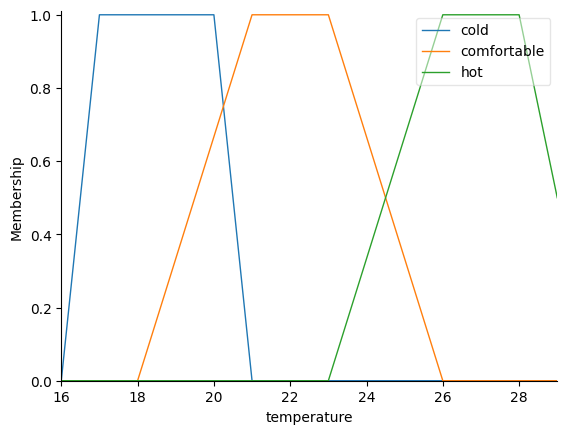

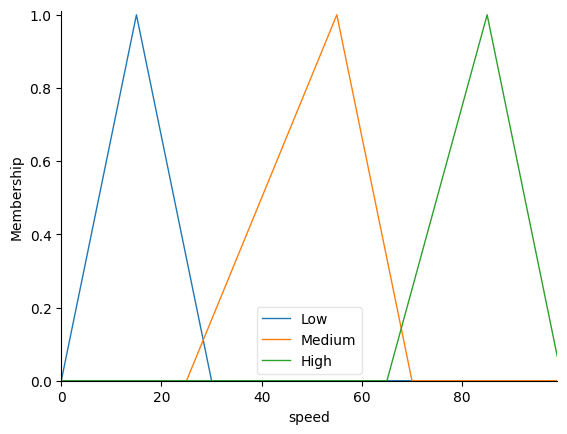

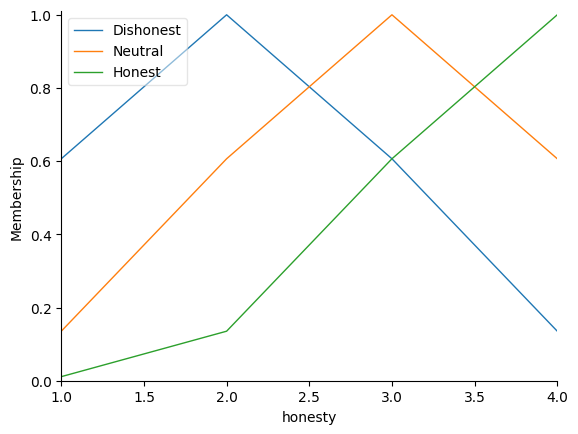

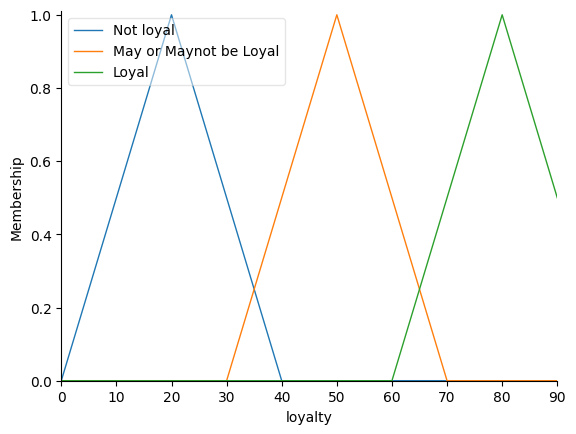

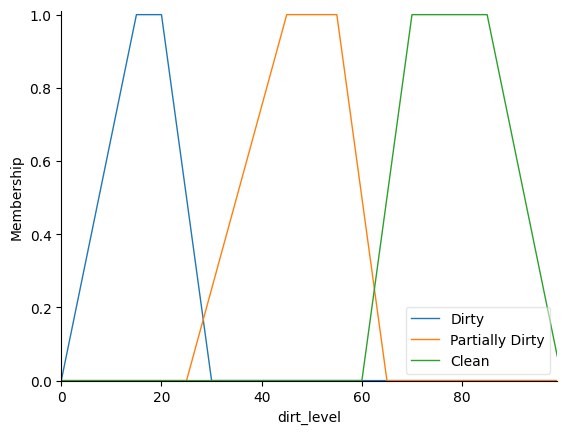

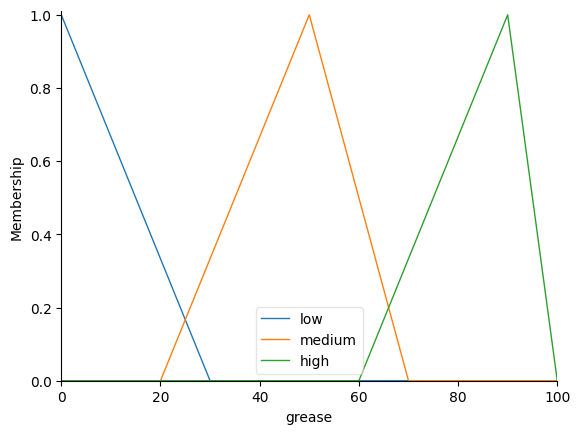

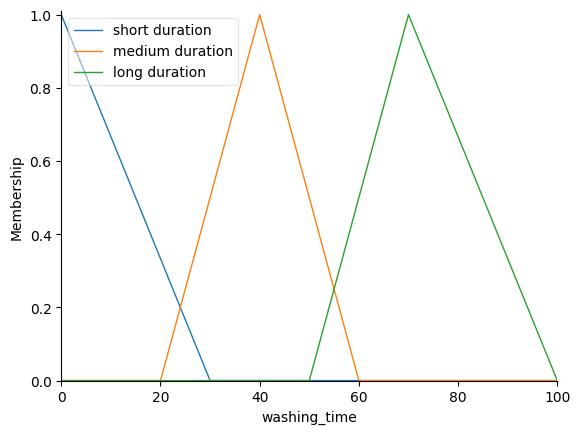

In [ ]:
# Visualize the membership functions
temperature.view()
speed.view()
honesty.view()
loyalty.view()
dirt_level.view()
grease.view()
washing_time.view()
plt.show()

In [ ]:
# Inputs
dirt_input = int(input("Enter dirt level in range (0-100): "))
grease_input = int(input("Enter grease level in range (0-100): "))
washing_machine.input['dirt_level'] = dirt_input
washing_machine.input['grease'] = grease_input
# Compute the result
washing_machine.compute()
washing_time_result = washing_machine.output['washing_time']
print(f"Washing time is: {washing_time_result:.2f} minutes")

Enter dirt level in range (0-100): 50
Enter grease level in range (0-100): 50
Washing time is: 40.00 minutes


# Experiment 9

In [ ]:
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass
from rich.console import Console
from rich.table import Table

In [ ]:
@dataclass
class TransportOption:
    name: str
    cost: int
    description: str

In [ ]:
@dataclass
class HotelPackage:
    name: str
    stay_cost: int
    food_cost: int
    description: str

In [ ]:
@dataclass
class VanityFoodOption:
    name: str
    cost: int
    description: str

In [ ]:
class TravelPlanner:
    def __init__(self):
        # Initialize transportation options
        self.transport_options: Dict[str, TransportOption] = {
            'train': TransportOption('Train', 1500, 'Base ticket cost'),
            'bus': TransportOption('Bus', 800, 'Base ticket cost'),
            'flight': TransportOption('Flight', 5000, 'Base ticket cost'),
            'vanity': TransportOption('Vanity Van', 12000, 'Includes transport & accommodation for 2 days')
        }
        # Initialize hotel packages
        self.hotel_packages: Dict[str, HotelPackage] = {
            'westin': HotelPackage('Westin', 8000, 2000, 'Luxury hotel near venue'),
            'kenilworth': HotelPackage('Kenilworth', 6000, 1500, 'Mid-range hotel'),
            'maria_rica': HotelPackage('Maria Rica', 4000, 1000, 'Budget-friendly option')
        }
        # Initialize vanity van food options
        self.vanity_food_options: Dict[str, VanityFoodOption] = {
            'cook': VanityFoodOption('Cook Self', 1000, 'Includes groceries and supplies'),
            'restaurant': VanityFoodOption('Eat Outside', 2000, 'Restaurant meals')
        }
    def calculate_total_cost(self, transport: str, hotel: Optional[str] = None,
                           vanity_food: Optional[str] = None, days: int = 2) -> Tuple[int, List[str]]:
        total_cost = 0
        path = []
        # Add transportation cost
        transport_option = self.transport_options[transport]
        total_cost += transport_option.cost
        path.append(f"Transport: {transport_option.name} (₹{transport_option.cost:,})")
        # Add accommodation and food cost
        if transport != 'vanity':
            if hotel:
                hotel_package = self.hotel_packages[hotel]
                hotel_cost = (hotel_package.stay_cost + hotel_package.food_cost) * days
                total_cost += hotel_cost
                path.append(f"Hotel: {hotel_package.name} - {days} days")
                path.append(f"  - Stay: ₹{hotel_package.stay_cost:,} × {days} = ₹{hotel_package.stay_cost * days:,}")
                path.append(f"  - Food: ₹{hotel_package.food_cost:,} × {days} = ₹{hotel_package.food_cost * days:,}")
        else:
            if vanity_food:
                food_option = self.vanity_food_options[vanity_food]
                total_cost += food_option.cost
                path.append(f"Vanity Food: {food_option.name} (₹{food_option.cost:,})")
        path.append(f"Total Cost: ₹{total_cost:,}")
        return total_cost, path
    def find_cheapest_option(self, days: int = 2) -> Tuple[int, List[str]]:
        min_cost = float('inf')
        best_path = []
        # Check all regular transport + hotel combinations
        for transport in ['train', 'bus', 'flight']:
            for hotel in self.hotel_packages.keys():
                cost, path = self.calculate_total_cost(transport, hotel, days=days)
                if cost < min_cost:
                    min_cost = cost
                    best_path = path
        # Check vanity van options
        for food_option in self.vanity_food_options.keys():
            cost, path = self.calculate_total_cost('vanity', vanity_food=food_option, days=days)
            if cost < min_cost:
                min_cost = cost
                best_path = path
        return min_cost, best_path
    def display_cost_tables(self):
        console = Console()
        # Transport Table
        transport_table = Table(title="Transportation Options")
        transport_table.add_column("Mode", style="cyan")
        transport_table.add_column("Cost (₹)", style="green")
        transport_table.add_column("Notes", style="yellow")
        for option in self.transport_options.values():
            transport_table.add_row(
                option.name,
                f"{option.cost:,}",
                option.description
            )
        # Hotel Table
        hotel_table = Table(title="Hotel Packages (Per Day)")
        hotel_table.add_column("Hotel", style="cyan")
        hotel_table.add_column("Stay Cost (₹)", style="green")
        hotel_table.add_column("Food Cost (₹)", style="green")
        hotel_table.add_column("Total/Day (₹)", style="bold green")
        for package in self.hotel_packages.values():
            hotel_table.add_row(
                package.name,
                f"{package.stay_cost:,}",
                f"{package.food_cost:,}",
                f"{package.stay_cost + package.food_cost:,}"
            )
        # Vanity Food Table
        vanity_table = Table(title="Vanity Van Food Options (2 Days)")
        vanity_table.add_column("Option", style="cyan")
        vanity_table.add_column("Cost (₹)", style="green")
        vanity_table.add_column("Notes", style="yellow")
        for option in self.vanity_food_options.values():
            vanity_table.add_row(
                option.name,
                f"{option.cost:,}",
                option.description
            )
        # Display all tables
        console.print(transport_table)
        console.print("")
        console.print(hotel_table)
        console.print("")
        console.print(vanity_table)

In [ ]:
# Initialize and execute TravelPlanner
planner = TravelPlanner()

In [ ]:
# Display cost tables
print("=== Travel Cost Reference Tables ===")
planner.display_cost_tables()
print("\n=== Sample Itineraries ===")

=== Travel Cost Reference Tables ===


                         Transportation Options                          
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Mode       ┃ Cost (₹) ┃ Notes                                         ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Train      │ 1,500    │ Base ticket cost                              │
│ Bus        │ 800      │ Base ticket cost                              │
│ Flight     │ 5,000    │ Base ticket cost                              │
│ Vanity Van │ 12,000   │ Includes transport & accommodation for 2 days │
└────────────┴──────────┴───────────────────────────────────────────────┘

                   Hotel Packages (Per Day)                   
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Hotel      ┃ Stay Cost (₹) ┃ Food Cost (₹) ┃ Total/Day (₹) ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Westin     │ 8,000         │ 2,000         │ 10,000        │
│ Kenilworth │ 6,000         │ 1,500         │ 7,500         │
│ Maria Rica │ 4,000         │ 1,000         │ 5,000         │
└────────────┴───────────────┴───────────────┴───────────────┘

              Vanity Van Food Options (2 Days)              
┏━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Option      ┃ Cost (₹) ┃ Notes                           ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Cook Self   │ 1,000    │ Includes groceries and supplies │
│ Eat Outside │ 2,000    │ Restaurant meals                │
└─────────────┴──────────┴─────────────────────────────────┘


=== Sample Itineraries ===


In [ ]:
# Example calculations
print("\n1. Luxury Option:")
cost, path = planner.calculate_total_cost('flight', 'westin')
for step in path:
    print(step)


1. Luxury Option:
Transport: Flight (₹5,000)
Hotel: Westin - 2 days
  - Stay: ₹8,000 × 2 = ₹16,000
  - Food: ₹2,000 × 2 = ₹4,000
Total Cost: ₹25,000


In [ ]:
print("\n2. Mid-Range Option:")
cost, path = planner.calculate_total_cost('train', 'kenilworth')
for step in path:
    print(step)


2. Mid-Range Option:
Transport: Train (₹1,500)
Hotel: Kenilworth - 2 days
  - Stay: ₹6,000 × 2 = ₹12,000
  - Food: ₹1,500 × 2 = ₹3,000
Total Cost: ₹16,500


In [ ]:
print("\n3. Budget Option:")
cost, path = planner.calculate_total_cost('bus', 'maria_rica')
for step in path:
    print(step)


3. Budget Option:
Transport: Bus (₹800)
Hotel: Maria Rica - 2 days
  - Stay: ₹4,000 × 2 = ₹8,000
  - Food: ₹1,000 × 2 = ₹2,000
Total Cost: ₹10,800


In [ ]:
print("\n4. Vanity Van Option:")
cost, path = planner.calculate_total_cost('vanity', vanity_food='cook')
for step in path:
    print(step)


4. Vanity Van Option:
Transport: Vanity Van (₹12,000)
Vanity Food: Cook Self (₹1,000)
Total Cost: ₹13,000


In [ ]:
print("\nCheapest Option:")
min_cost, best_path = planner.find_cheapest_option()
for step in best_path:
    print(step)


Cheapest Option:
Transport: Bus (₹800)
Hotel: Maria Rica - 2 days
  - Stay: ₹4,000 × 2 = ₹8,000
  - Food: ₹1,000 × 2 = ₹2,000
Total Cost: ₹10,800
